In [1]:
import pandas as pd

train = pd.read_csv('/kaggle/input/playground-series-s3e24/train.csv')
test = pd.read_csv('/kaggle/input/playground-series-s3e24/test.csv')
sample_submission = pd.read_csv('/kaggle/input/playground-series-s3e24/sample_submission.csv')

In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159256 entries, 0 to 159255
Data columns (total 24 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   159256 non-null  int64  
 1   age                  159256 non-null  int64  
 2   height(cm)           159256 non-null  int64  
 3   weight(kg)           159256 non-null  int64  
 4   waist(cm)            159256 non-null  float64
 5   eyesight(left)       159256 non-null  float64
 6   eyesight(right)      159256 non-null  float64
 7   hearing(left)        159256 non-null  int64  
 8   hearing(right)       159256 non-null  int64  
 9   systolic             159256 non-null  int64  
 10  relaxation           159256 non-null  int64  
 11  fasting blood sugar  159256 non-null  int64  
 12  Cholesterol          159256 non-null  int64  
 13  triglyceride         159256 non-null  int64  
 14  HDL                  159256 non-null  int64  
 15  LDL              

In [3]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106171 entries, 0 to 106170
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   106171 non-null  int64  
 1   age                  106171 non-null  int64  
 2   height(cm)           106171 non-null  int64  
 3   weight(kg)           106171 non-null  int64  
 4   waist(cm)            106171 non-null  float64
 5   eyesight(left)       106171 non-null  float64
 6   eyesight(right)      106171 non-null  float64
 7   hearing(left)        106171 non-null  int64  
 8   hearing(right)       106171 non-null  int64  
 9   systolic             106171 non-null  int64  
 10  relaxation           106171 non-null  int64  
 11  fasting blood sugar  106171 non-null  int64  
 12  Cholesterol          106171 non-null  int64  
 13  triglyceride         106171 non-null  int64  
 14  HDL                  106171 non-null  int64  
 15  LDL              

In [4]:
import numpy as np

# Function to detect outliers using the IQR method
def detect_outliers(df, columns):
    outliers = {}
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers[column] = df[(df[column] < lower_bound) | (df[column] > upper_bound)].shape[0]
    return outliers

# Columns to check for outliers
columns_to_check = train.select_dtypes(include=[np.number]).columns

# Detect outliers in train dataset
train_outliers = detect_outliers(train, columns_to_check)
train_outliers

{'id': 0,
 'age': 682,
 'height(cm)': 463,
 'weight(kg)': 2296,
 'waist(cm)': 858,
 'eyesight(left)': 2324,
 'eyesight(right)': 2493,
 'hearing(left)': 3818,
 'hearing(right)': 3730,
 'systolic': 1592,
 'relaxation': 981,
 'fasting blood sugar': 8160,
 'Cholesterol': 430,
 'triglyceride': 3087,
 'HDL': 1932,
 'LDL': 495,
 'hemoglobin': 1493,
 'Urine protein': 8394,
 'serum creatinine': 5943,
 'AST': 6337,
 'ALT': 6746,
 'Gtp': 8792,
 'dental caries': 31532,
 'smoking': 0}

In [5]:
# Function to cap outliers using the IQR method
def cap_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
        df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    return df

# Cap outliers in the train dataset
train_capped = cap_outliers(train, columns_to_check)
train_capped

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.0,55.0,165.0,60.0,81.0,0.5,0.6,1.0,1.0,135.0,...,40.0,75.0,16.5,1.0,1.0,22.0,25.0,27.0,0.0,1.0
1,1.0,70.0,165.0,65.0,89.0,0.6,0.7,1.0,1.0,146.0,...,57.0,126.0,16.2,1.0,1.1,27.0,23.0,37.0,0.0,0.0
2,2.0,20.0,170.0,75.0,81.0,0.4,0.5,1.0,1.0,118.0,...,45.0,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0,1.0
3,3.0,35.0,180.0,95.0,105.0,1.5,1.2,1.0,1.0,131.0,...,38.0,102.0,15.9,1.0,1.0,20.0,27.0,30.0,0.0,0.0
4,4.0,30.0,165.0,60.0,80.5,1.5,1.0,1.0,1.0,121.0,...,44.0,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251.0,40.0,155.0,45.0,69.0,1.5,1.8,1.0,1.0,127.0,...,72.0,159.0,14.5,1.0,0.8,25.0,26.0,13.0,0.0,0.0
159252,159252.0,50.0,155.0,75.0,82.0,1.0,1.0,1.0,1.0,120.0,...,64.0,108.0,14.5,1.0,0.6,21.0,20.0,18.0,0.0,0.0
159253,159253.0,40.0,160.0,50.0,66.0,1.5,1.0,1.0,1.0,114.0,...,87.0,93.0,10.9,1.0,0.6,15.0,9.0,12.0,0.0,0.0
159254,159254.0,50.0,165.0,75.0,92.0,1.2,1.0,1.0,1.0,121.0,...,55.0,80.0,14.4,1.0,1.1,22.0,17.0,37.0,0.0,1.0


In [6]:
# Perform one-hot encoding for categorical columns in the train dataset
train_encoded = pd.get_dummies(train_capped, drop_first=True)
train_encoded

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,smoking
0,0.0,55.0,165.0,60.0,81.0,0.5,0.6,1.0,1.0,135.0,...,40.0,75.0,16.5,1.0,1.0,22.0,25.0,27.0,0.0,1.0
1,1.0,70.0,165.0,65.0,89.0,0.6,0.7,1.0,1.0,146.0,...,57.0,126.0,16.2,1.0,1.1,27.0,23.0,37.0,0.0,0.0
2,2.0,20.0,170.0,75.0,81.0,0.4,0.5,1.0,1.0,118.0,...,45.0,93.0,17.4,1.0,0.8,27.0,31.0,53.0,0.0,1.0
3,3.0,35.0,180.0,95.0,105.0,1.5,1.2,1.0,1.0,131.0,...,38.0,102.0,15.9,1.0,1.0,20.0,27.0,30.0,0.0,0.0
4,4.0,30.0,165.0,60.0,80.5,1.5,1.0,1.0,1.0,121.0,...,44.0,93.0,15.4,1.0,0.8,19.0,13.0,17.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159251,159251.0,40.0,155.0,45.0,69.0,1.5,1.8,1.0,1.0,127.0,...,72.0,159.0,14.5,1.0,0.8,25.0,26.0,13.0,0.0,0.0
159252,159252.0,50.0,155.0,75.0,82.0,1.0,1.0,1.0,1.0,120.0,...,64.0,108.0,14.5,1.0,0.6,21.0,20.0,18.0,0.0,0.0
159253,159253.0,40.0,160.0,50.0,66.0,1.5,1.0,1.0,1.0,114.0,...,87.0,93.0,10.9,1.0,0.6,15.0,9.0,12.0,0.0,0.0
159254,159254.0,50.0,165.0,75.0,92.0,1.2,1.0,1.0,1.0,121.0,...,55.0,80.0,14.4,1.0,1.1,22.0,17.0,37.0,0.0,1.0


In [7]:
test_encoded = pd.get_dummies(test, drop_first=True)
test_encoded

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries
0,159256,40,165,70,84.0,1.2,1.2,1,1,130,...,186,49,115,14.2,1,0.9,19,25,32,0
1,159257,80,160,60,93.0,1.0,1.0,2,2,144,...,158,35,104,13.0,1,1.1,20,12,24,0
2,159258,60,170,70,86.5,0.6,0.7,1,1,117,...,173,39,88,15.4,1,1.4,38,60,36,0
3,159259,40,160,50,67.0,0.3,0.4,1,1,116,...,47,75,128,14.5,1,0.6,25,18,10,1
4,159260,40,170,75,89.4,1.0,0.9,1,1,132,...,100,39,123,16.5,1,1.0,30,39,27,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106166,265422,40,165,60,78.0,0.8,0.9,1,1,112,...,82,59,149,16.4,1,1.1,24,31,28,0
106167,265423,40,170,85,95.0,1.2,1.2,1,1,130,...,186,44,100,16.0,2,1.0,25,31,38,0
106168,265424,35,170,85,89.0,1.2,1.2,1,1,131,...,76,53,142,15.9,1,0.8,33,32,24,1
106169,265425,40,160,60,67.0,0.7,0.8,1,1,120,...,81,55,103,13.9,1,0.6,42,36,32,0


In [8]:
features = train_encoded[['height(cm)', 'weight(kg)', 'waist(cm)', 'eyesight(left)', 'eyesight(right)',
                           'hearing(left)', 'hearing(right)', 'systolic', 'relaxation', 'fasting blood sugar',
                           'Cholesterol', 'triglyceride', 'HDL', 'LDL', 'hemoglobin', 'Urine protein',
                           'serum creatinine', 'AST', 'ALT', 'Gtp', 'dental caries']]

In [9]:
target = train_encoded['smoking']

In [10]:
X = features
y = target

In [11]:
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, stratify=target, random_state=42)

In [12]:
%%time

from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import numpy as np


# Initialize the scaler
scaler = StandardScaler()

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize arrays to store all predictions and true labels
all_predictions = []
all_true_labels = []

# Perform K-Fold cross-validation
for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    
    # Standardize the features
    X_train_scaled = scaler.fit_transform(X_train_fold)
    X_test_scaled = scaler.transform(X_test_fold)
    
    # Define the neural network model architecture
    def build_model(input_dim, num_classes):
        model = Sequential()
        model.add(Dense(64, input_dim=input_dim, activation='relu'))
        model.add(Dropout(0.3))
        model.add(Dense(32, activation='relu'))
        model.add(Dense(num_classes, activation='softmax'))  # Output layer for multi-class classification
        model.compile(optimizer='adam', loss='categorical_crossentropy')
        return model

    # Build and train the model
    model = build_model(input_dim=X_train_scaled.shape[1], num_classes=2)
    
    # Early stopping callback
    early_stop = EarlyStopping(monitor='val_loss', patience=1, restore_best_weights=True)
    
    # Train the model
    model.fit(X_train_scaled, pd.get_dummies(y_train_fold), epochs=5, batch_size=32, validation_data=(X_test_scaled, pd.get_dummies(y_test_fold)), callbacks=[early_stop], verbose=1)
    
    # Predict probabilities on the test set
    y_pred_proba = model.predict(X_test_scaled)
    
    # Store the predictions and true labels
    all_predictions.append(y_pred_proba)
    all_true_labels.append(pd.get_dummies(y_test_fold).values)

# Combine all predictions and true labels
y_pred_proba_all = np.vstack(all_predictions)
y_true_all = np.vstack(all_true_labels)

# Calculate the ROC AUC score
roc_auc = roc_auc_score(y_true_all, y_pred_proba_all, multi_class='ovr')
roc_auc

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.4912 - val_loss: 0.4655
Epoch 2/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4654 - val_loss: 0.4658
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2987/2987 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4957 - val_loss: 0.4658
Epoch 2/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4672 - val_loss: 0.4630
Epoch 3/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4633 - val_loss: 0.4619
Epoch 4/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4614 - val_loss: 0.4622
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2987/2987 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4991 - val_loss: 0.4661
Epoch 2/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4677 - val_loss: 0.4637
Epoch 3/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4656 - val_loss: 0.4627
Epoch 4/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4615 - val_loss: 0.4631
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2987/2987 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4972 - val_loss: 0.4576
Epoch 2/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4685 - val_loss: 0.4596
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2987/2987 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - loss: 0.4923 - val_loss: 0.4620
Epoch 2/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4671 - val_loss: 0.4600
Epoch 3/5
2987/2987 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - loss: 0.4654 - val_loss: 0.4621
747/747 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
CPU times: user 1min 52s, sys: 16.1 s, total: 2min 8s
Wall time: 1min 42s


0.8503139408657212

In [25]:
import pickle

# Save the trained neural network model to a pickle file
with open('smoking_status_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [15]:
# Scale the test features
X_test_scaled = scaler.transform(X_test)

# Predict probabilities for the test set using the neural network model
y_test_pred_proba_nn = model.predict(X_test_scaled)

y_test_pred_proba_nn

1245/1245 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step


array([[0.30612993, 0.6938701 ],
       [0.44383442, 0.5561655 ],
       [0.73376167, 0.26623836],
       ...,
       [0.4662084 , 0.53379154],
       [0.6077443 , 0.39225572],
       [0.7131595 , 0.28684047]], dtype=float32)

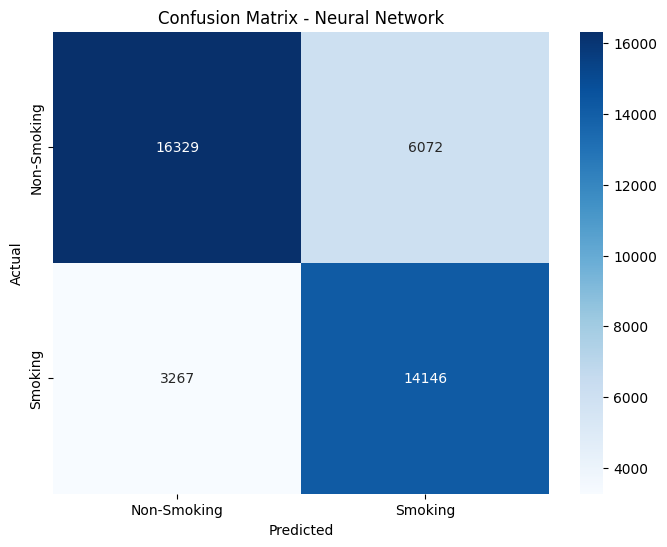

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert probabilities to binary predictions using a threshold of 0.5
y_test_pred_nn = (y_test_pred_proba_nn[:, 1] >= 0.5).astype(int)

# Generate confusion matrix for the neural network model
confusion_matrix_test_nn = confusion_matrix(y_test, y_test_pred_nn)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_test_nn, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Smoking', 'Smoking'], yticklabels=['Non-Smoking', 'Smoking'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Neural Network')
plt.show()

- From results :

- The model classified 16,329 as non smoking & 14,146 as smoking status.